<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Aditya!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

There is an online car marketplace called __Crankshaft List__ where hundreds of free vehicle advertisements are published every day.

There are data about the characteristics of the vehicle, such as model, year of manufacture, current condition, vehicle mileage, as well as such characteristics of the ad as the date of publication and the days listed, as well as the price of the vehicle.

The purpose of the study: to conduct an EDA and determine which factors influence the price of a vehicle.

The Work Plan:

1. [Getting the data and study the general information](#1.-Open-Dataset-and-look-at-the-General-information)
2. [Data Preprocessing](#2.-Data-Preprocessing)
    <br>2.1 [Processing missing values](#2.1-Processing-missing-values)
    <br>2.2 [Data type replacement](#2.1-Changing-Datatypes)
3. [Additional calculations](#3.-Additional-Calculations)
4. [Exploratory data analysis](#4.-Exploratory-Data-Analysis)
5. [Overall Conclusion](#5.-Overall-Conclusion)


__Note:__ There seems to be some kind of compatibility issue between numexpr and pandas. This definitely looks buggy, and until it is fixed, we will have to fall back to the 'python' engine.

## 1. Open Dataset and look at the General information

We start this analysis by loading the dataset and looking at the first 5 rows to get an idea about it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#function to convert series of string dates to datetime types
def convert_to_datetime(str_dates):
    return pd.to_datetime(str_dates, format='%Y-%m-%d')

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

In [2]:
# read the data from a csv file
try:
    data = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/EDA/vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')
print(BOLD + 'The first 5 rows of the dataset:' + END)
data.head()

The first 5 rows of the dataset:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, a big plus for using `try-except` for data import.
</div>

We call the .info() function to get more information about our dataset.

In [3]:
print(BOLD + 'General Information:' + END)
data.info()

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


There are __*51525*__ rows in the dataset for 13 features.

- There are missing values in the columns of *'model_year'*, *'cylinders'*, *'odometer'*, *'paint_color'*, and *'is_4wd'*.
- The columns *'model_year'*, *'cylinders'*, *'odometer'* and *'is_4wd'* use float64 datatype. For the columns *'model_year'* and *'cylinder'* we can use int16 datatype as these values aren't to big to necessitate the use of float64 or int64. For the column *'is_4wd'* boolean type should be enough.
- The column *'days_listed'* uses int64 datatype. This seems excessive. We can use int16 here.
- The column *'date_posted'* is a string type. We have to convert this to __*datetime*__ to make the working convenient.

In [4]:
print(BOLD + 'Descriptive statistics of the dataset:' + END)
data.describe()

Descriptive statistics of the dataset:


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


#### Let's look at numerical and categorical features in more detail

In [5]:
#creating the corresponding lists
numeric_cols = ['price', 'model_year', 'odometer', 'date_posted', 'days_listed']
categorical_cols = ['model', 'condition', 'cylinders', 'fuel',\
                    'transmission', 'type', 'paint_color', 'is_4wd']

#looking at the values that take numerical features 
print(BOLD + 'The values that take numerical features:' + END)
print(BOLD + "Note:" + END + "'date_posted' is assigned to numeric features to see min and max values")
print()
print(data[numeric_cols].agg(['min', 'max', 'mean', 'median']).T)
print('\n')

#Let's look at the values that take categorical features 
print(BOLD + 'The values that take categorical features:' + END)
print(BOLD + "Note:" + END + "'cylinders' is assigned to categorical features to see a set of values" +\
          "although the values of this feature can be compared")
print()
pd.set_option('display.max_colwidth', 500)
data[categorical_cols].agg(['unique']).T

The values that take numerical features:
Note:'date_posted' is assigned to numeric features to see min and max values

                    min         max     mean  median
price                 1      375000  12132.5    9000
model_year         1908        2019  2009.75    2011
odometer              0      990000   115553  113000
date_posted  2018-05-01  2019-04-19      NaN     NaN
days_listed           0         271  39.5548      33


The values that take categorical features:
Note:'cylinders' is assigned to categorical features to see a set of valuesalthough the values of this feature can be compared



,unique
model,"[bmw x5, ford f-150, hyundai sonata, chrysler 200, chrysler 300, toyota camry, honda pilot, kia sorento, chevrolet silverado 1500, honda accord, ram 1500, gmc yukon, jeep cherokee, chevrolet traverse, hyundai elantra, chevrolet tahoe, toyota rav4, chevrolet silverado, jeep wrangler, chevrolet malibu, ford fusion se, chevrolet impala, chevrolet corvette, jeep liberty, toyota camry le, nissan altima, subaru outback, toyota highlander, dodge charger, toyota tacoma, chevrolet equinox, nissan rog..."
condition,"[good, like new, fair, excellent, salvage, new]"
cylinders,"[6.0, 4.0, 8.0, nan, 5.0, 10.0, 3.0, 12.0]"
fuel,"[gas, diesel, other, hybrid, electric]"
transmission,"[automatic, manual, other]"
type,"[SUV, pickup, sedan, truck, coupe, van, convertible, hatchback, wagon, mini-van, other, offroad, bus]"
paint_color,"[nan, white, red, black, blue, grey, silver, custom, orange, yellow, brown, green, purple]"
is_4wd,"[1.0, nan]"



<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Unfortunately, here the code provides error, so, this error causes the errors on other cells too, so I cannot reproduce your code entirely. Here the problem in the names of the columns.
        
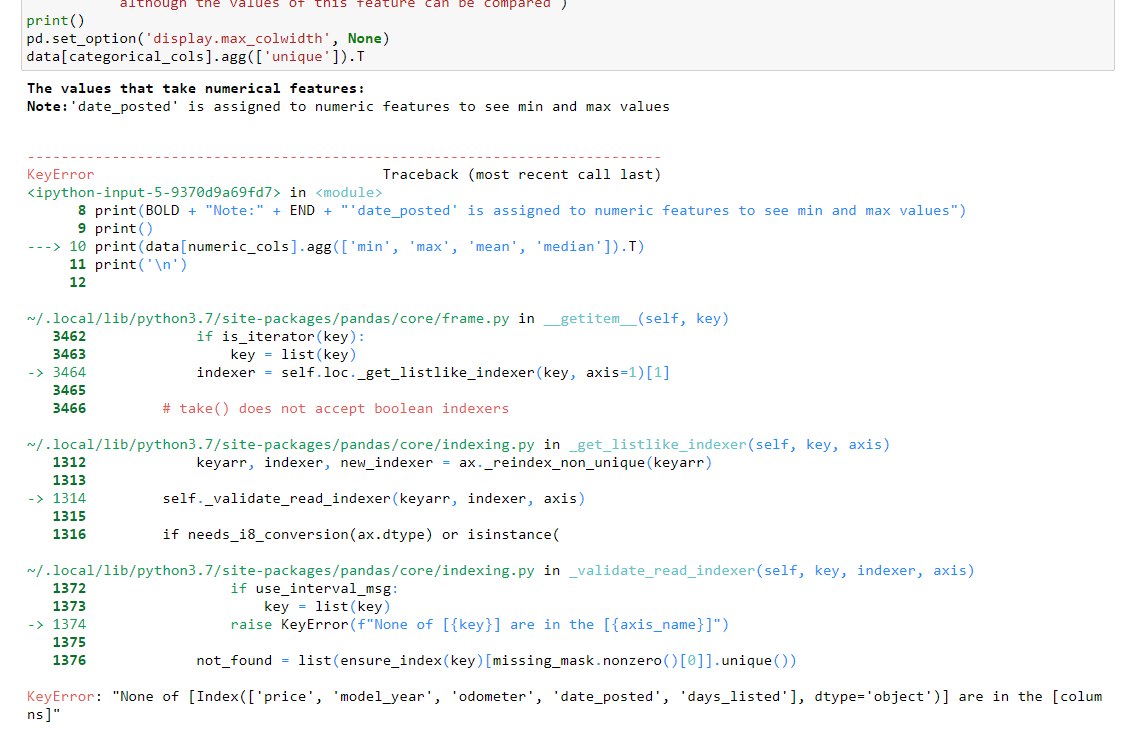
        
So, my recommendation: before submitting the project for the review, please, try to restart and run all cells to check if the code works correclty:
        
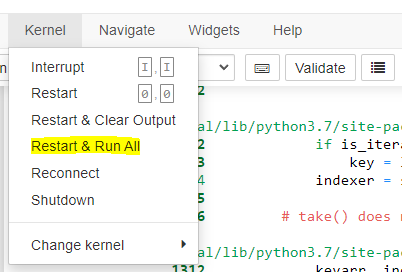
</div>

<div class="alert alert-info">
<b>Student's comment</b>
    <p>I made a very specific mistake while importing the dataset. And that was the reason, the code didn't work past the 1st level of analysis. This was working on my system, as I am working locally. I have rectified my mistake and I hope it works now.</p>
</div>

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, thank you for clarification! Yes, this time the code works good!
</div>

The dataset contains ads from May 2018 to April 2019. The ads on the website stay up, in average, for a little over a month.

The \\$1 minimum price for a car looks incorrect. And also the \\$375,000 maximum price looks enormous. Moreovere we see that the average is greater than the median. This implies that *'price'* feature has outliers with large values.

The model year 1908 also looks strange. Or maybe it is one of the the first famous production car by the Ford Motor Company, the Model T. But we don't have that in the list of models. Moreover, the average here is less than the median. Other outliers can be observed in the early years.

There is quite a large number of values for the categorical feature *'model'*. It would be interesting to see how the vehicle brand (matches the first word in the model name) affects the price and other features. It seems that there may be some correlation.

The variable *'is_4wd'* takes only two values: 1 and NaN. It turns out that the unknown value corresponds to vehicles that do not have four-wheel drive. Perhaps there was a checkbox in the form, in which the owners marked if the car is 4WD. And if there was no mark, then the value is acctually not known. It can be assumed that the value is skipped only for cars without 4WD. It makes sense to replace the NaN values with 0. We can use boolean type for it.

In addition, the values for the columns *'days_listed'* are such that the type int16 would be enough for it. The column *'cylinders'* indeed contains integer values. The type Int8 would be enough for it and we will not use int16 unlike discussed above.

The columns *'cylinders'* and *'paint_color'* contains unknown values and they are represented by the value NaN in the table. It does not look like these values can be restored from other fields, for example, the model does not contain information about them.

We need to check a few more things.
<br>First, we check for duplicated data.

In [6]:
print('Number of rows with duplicated data:', data.duplicated().sum())

Number of rows with duplicated data: 0


And, We also need to check the number of ads with the price \\$1.

In [7]:
too_small_price = data.query('price == 1')
print('Number of ads with price set at $1:', len(too_small_price))
#print('Percentage of prices at $1:', 100*len(too_small_price)/len(data))

Number of ads with price set at $1: 798



<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
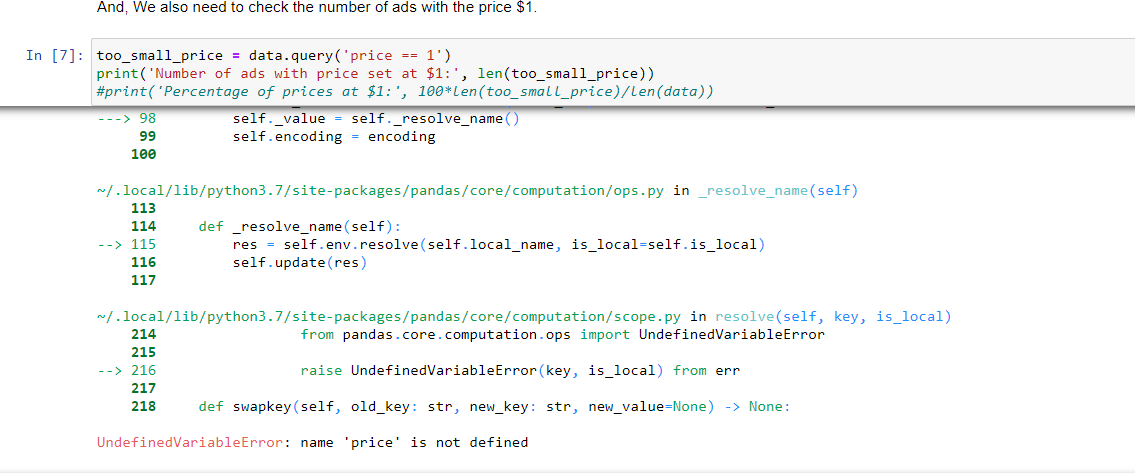

There are actually 798 ads with a price equals to \\$1. We have to take a look at these before proceeding onto the analysis.

Finally, we use the seaborn and matplotlib packages to get a visual representation of the correlation matrix.

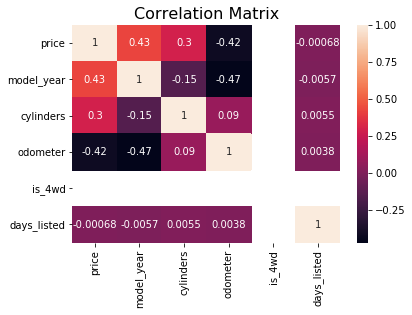

In [8]:
plt.title('Correlation Matrix', fontsize=16)
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

The goal of this analysis is to determine which factors influence the price of a vehicle. So we are looking positive or negative appropriate correlations to find these factor.

In the matrix we can read Pearson correlation coefficient which tells us how much one value changes when the other changes. It takes values from -1 to 1. The closer the coefficient is to -1 or 1 , the stronger the dependency. Close to 0, we have weak connection. Zero means there is no dependency or there is complex and non-linear relationship.

*'price'* has the strongest correlation with *'model_year'* (0.43), *'model_year'* with *'odometer'* (-0.47) and vice versa. *'cylinders'* have the strongest correlation with *'model_year'* (-0.47). Correlation matrix can also help in determing how to fill the missing values so I will consider this descriptive statistic when I will fill up the missing value.

### 1.1 Conclusion

The dataset contains 51525 advertisements for the sale of vehicles published over a period of almost one years. Each ad consists of 9 obligatory fields and 4 fields that are not filled in all ads.

The following problems in the data could be identified:

- unknown values for some features
- there are inadequately low and high prices
- surprisingly old cars (there are ads for the sale of a vehicle that is 110 years old, see the minimum value of the *'model_year'* feature)
- non-four-wheel drive vehicles have NaN values in 'is_4wd' column
- There are no duplicated rows but I did find artifacts; *'price'* == 1. These will be considered as a missing value which needs to be replaced with another one

Thus, it is necessary to fill in the gaps where it's possible and to look at the distribution of features with odd values and to filter out outliers.

In addition, the type of the columns *'days_listed'* and *'model_year'* can be converted to the type int16, the type of *'cylinders'* to int8 , the type of *'date_posted'* to datetime and the type of *'is_4wd'* to bool.

It makes sense to add an additional feature that corresponds to the brand of the vehicle.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, you studied the data in detail, so let's move on!😎

## 2. Data Preprocessing

### 2.1 Processing missing values

Let us look at the number and percentage of missing values per column.

In [9]:
pd.DataFrame({'missing_number': data.isnull().sum(), 'missing_percentage': round(data.isnull().sum() * 100 / len(data), 2)}).query('missing_number > 0')

,missing_number,missing_percentage
model_year,3619,7.02
cylinders,5260,10.21
odometer,7892,15.32
paint_color,9267,17.99
is_4wd,25953,50.37


Half of the cars are not 4 wheel drive. Let us just fill these gaps with 0 as a flag.

Quite large percentage of values are also missing in the columns *'model_year'*, *'cylinders'*, *'odometer'*, and *'paint_color'*. 

Perhaps these are not obligatory fields on the form. Or there are some reasons for these missing values. The number of cylinders can be undefined in the case of electric cars. Odometer may not be filled for vehicles without mileage. It may be that a particular color was incorrectly exported and formed all the gaps in the corresponding column. This can be checked.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is absolutely correct to check the missing values percentage, you can do it also using these code alternatives:
 
    
`data.isna().sum()*100/len(data)`
       
`pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')`
       
`data.isna().mean() * 100`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`
        
Also there is one rather useful library for working with the data - `sidetable`, it offers a great number of effective methods for working with the data, including missing values. More info here:
       
https://pbpython.com/sidetable.html
       
https://github.com/chris1610/sidetable
       
Tip! If you decide to use sidetable library, don't forget to install it in the jupyter notebook, using `!pip install -U sidetable`

In [10]:
#filling gaps in the is_4wd column with 0
data['is_4wd'].fillna(0, inplace=True)

#Checking if any missing values remain
data['is_4wd'].isnull().sum()

0

Missing values in *'is_4wd'* have been filled.

Let's look at frequency of diffrent colors or possible lack of some color.

In [11]:
data.paint_color.value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

It looks like there are no common colors missing, which would be as popular as white or black (the number of missing values is comparable to the number of vehicles of the most popular colors).

So, let us fill up these missing values with 'Unknown'.

In [12]:
data['paint_color'] = data['paint_color'].fillna('Unknown')

#And let us check if we have any missing values are left in this column.
data['paint_color'].isnull().sum()

0

Missing values in *'paint_color'* have been filled.

One of the reasons why the values are missing in *'paint_color'* could be the seller included photo of the vehicle in the advert. Then the color is obvious from the photo and there is no big need to emphasize *'paint_color'*.

We need to see the rows with *'model_year'* as 1908.

In [13]:
print(data.query('model_year == 1908'))

       price  model_year              model  condition  cylinders fuel  \
33906  12995      1908.0          gmc yukon       good        8.0  gas   
33907  12995      1908.0  cadillac escalade  excellent        8.0  gas   

       odometer transmission type paint_color  is_4wd date_posted  days_listed  
33906  169328.0    automatic  SUV       black     0.0  2018-07-06           34  
33907       NaN    automatic  SUV       white     0.0  2018-06-24           25  


The dataset contains only 2 entries with *'model_year'* as 2008. But these cars are not the famous Ford Model T, but rather a GMC Yukon and a Cadillac Escalade.

We can very easily drop these two entries without skewing our dataset.

In [14]:
data.drop(data.index[(data['model_year'] == 1908)],axis=0,inplace=True)
print(data.query('model_year == 1908'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


Let us reset the indices and check at the info again.

In [15]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      47904 non-null float64
model           51523 non-null object
condition       51523 non-null object
cylinders       46263 non-null float64
fuel            51523 non-null object
odometer        43632 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null float64
date_posted     51523 non-null object
days_listed     51523 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Now, we have 51523 entries, with missing values in *'model_year'*, *'cylinders'*, and *'odometer'*.

Let us now take a data slice of '*model_year*' where *'model_year'* is missing.

In [16]:
no_model_year = data.query('model_year.isna()', engine='python')
print(no_model_year['model'].value_counts())

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
buick enclave                         14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64


Using value_count() we can see what are the most usual *'models'* where we have missing *'model_year'*. Now, we will look up into the most common *'model'*.

In [17]:
ford_f_150 = data.query('model == "ford f-150"')

In [18]:
print(ford_f_150['model_year'].value_counts())
print('Mean of model year:', ford_f_150['model_year'].mean())
print('Median of model year:', ford_f_150['model_year'].median())
print('Mode of model year:', ford_f_150['model_year'].mode())

2013.0    252
2014.0    222
2011.0    222
2010.0    202
2016.0    160
2015.0    150
2012.0    144
2018.0    122
2006.0    122
2005.0    117
2007.0    116
2008.0    107
2004.0     86
2017.0     82
2009.0     73
2003.0     70
2002.0     58
2001.0     44
2000.0     44
1998.0     43
1999.0     36
1997.0     29
1995.0     18
1996.0     14
1994.0     13
1993.0     11
2019.0     10
1989.0      5
1992.0      5
1979.0      5
1991.0      4
1986.0      4
1988.0      4
1987.0      4
1990.0      2
1936.0      1
1954.0      1
1929.0      1
1975.0      1
1977.0      1
Name: model_year, dtype: int64
Mean of model year: 2009.3547024952015
Median of model year: 2011.0
Mode of model year: 0    2013.0
dtype: float64


Using value_counts method we see that in model "ford_f_150" there are: 252 vehicles made in 2013, 222 vehicles made in 2014. but also 222 vehicles made in 2011. and 202 vehicles made in 2010. Only looking at the numbers greater than 200 we can conclude it is not smart to use mode to fill up the missing values in 'model_year'. We should use mean or median. Mean is 2009 and median is 2011. According to mean and median values the data is skewed so we should use median to fill up the missing values in 'model_year'.

In [19]:
data['model_year'] = data.groupby('model')['model_year'].transform(lambda x : x.fillna(x.median()))

If there is a missing *'model_year'* the transform() method will perform the transformation. It will apply median() according to specific *'model'* of a missing *'model_year'*.

In [20]:
data['model_year'].isnull().sum()

0

We have filled the missing values in *'model_year'* column.

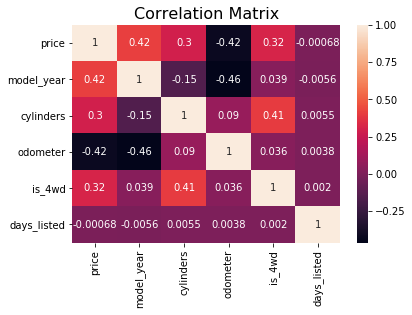

In [21]:
plt.title('Correlation Matrix', fontsize=16)
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Once again checking our correlation matrix, we can se there is a strong positive correlation between *'model_year'* and *'price'* (0.42). This mean the "younger" the vehicle, higher the price. This could be the reason why there are around 7% of missing values in *'model_year'*.

Now, let us look at the *'cylinders'* column. From the above correlation matrix, we see that there is a medium-to-strong positive correlation between number of cylinders and price. The higher the number of cylinders, the higer price of a vehicle. This could be one of the reasons why there are 10% missing values in *'cylinders'*.

In [22]:
no_cylinder = data.query('cylinders.isnull()', engine='python')
print(no_cylinder['model'].value_counts())

ford f-150                           316
chevrolet silverado 1500             231
ram 1500                             185
chevrolet silverado                  137
ram 2500                             122
                                    ... 
ford f350 super duty                  20
ford f150 supercrew cab xlt           20
dodge dakota                          18
bmw x5                                16
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64


Again, we can see the models with the most missing values in *'model_year'* are the same models with the most missing values in *'cylinder'*.

In [23]:
print(ford_f_150['cylinders'].value_counts())
print('Mode of cylinder count', ford_f_150['cylinders'].mode())
print('Mean of cylinder count', ford_f_150['cylinders'].mean())
print('Median of cylinder count', ford_f_150['cylinders'].median())

8.0     1584
6.0      863
10.0      18
4.0       11
5.0        2
3.0        2
Name: cylinders, dtype: int64
Mode of cylinder count 0    8.0
dtype: float64
Mean of cylinder count 7.294354838709677
Median of cylinder count 8.0


We see that the mode and the median are equal. We will use the median to fill up the missing values in *'cylinders'*.

In [24]:
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda x : x.fillna(x.median()))

Similarly, If there is a missing *'cylinders'* the transform() method will perform the transformation. It will apply median() according to specific *'model'* of a missing *'cylinders'*.

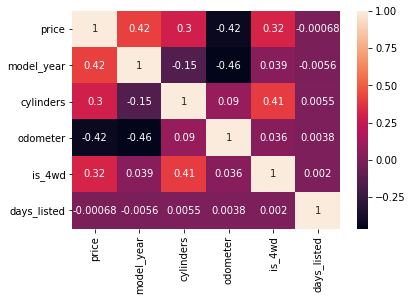

In [25]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

Again from our correlation matrix we can see that there is the a strong negative correlation between *'odometer'* and *'model_year'* (-0.46.) This would mean the higher the *'model_year'* (the "younger" the vehicle), the lower the mileage.

As well, we can see stong dependency with *'price'* and *'odometer'* (-0.42). It means the higher mileage, lower the price of a vehicle. This is probably why there are 15% missing values in 'odometer'. People would rather not talk about how many miles has their vehicle in the wheels.

We will fill up the missing values in *'odometer'* with corresponding mileage grouped by a *'model_year'*.

In [26]:
print(data.query('odometer.isnull()', engine='python')['model_year'].value_counts())
print('Mean of model year:', (data.query('odometer.isnull()', engine='python')['model_year'].mean()))
print('Median of model year:', (data.query('odometer.isnull()', engine='python')['model_year'].median()))
print('Mode of model year:', (data.query('odometer.isnull()', engine='python')['model_year'].mode()))

2013.0    645
2012.0    613
2011.0    612
2008.0    558
2014.0    557
2015.0    519
2010.0    460
2016.0    455
2007.0    406
2017.0    381
2009.0    369
2018.0    343
2005.0    330
2006.0    321
2004.0    252
2003.0    216
2002.0    162
2000.0    138
2001.0    130
1999.0     78
1998.0     61
1997.0     55
2019.0     52
1996.0     26
1995.0     24
1993.0     22
1994.0     19
1989.0     14
1990.0      8
1986.0      8
1992.0      8
1991.0      5
1966.0      4
2006.5      4
1968.0      4
1988.0      4
1977.0      3
1970.0      3
2010.5      3
1983.0      2
1978.0      2
1982.0      1
1964.0      1
1963.0      1
1979.0      1
1985.0      1
1971.0      1
1960.0      1
1975.0      1
1929.0      1
1974.0      1
1981.0      1
1987.0      1
1980.0      1
1973.0      1
1976.0      1
Name: model_year, dtype: int64
Mean of model year: 2009.8420352300088
Median of model year: 2011.0
Mode of model year: 0    2013.0
dtype: float64


After checking which are the most common years for vehicles with a missing value in *'odometer'*, and after printing the mean, median and mode of said *'model_year'*. we must fill the missing values in *'odometer'* again using median value.

In [27]:
data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x : x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Similarly, If there is a missing *'odometer'* the transform() method will perform the transformation. It will apply median() according to specific *'model_year'* of a missing *'odometer'*.

We check the info of our current dataset.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      51523 non-null float64
model           51523 non-null object
condition       51523 non-null object
cylinders       51523 non-null float64
fuel            51523 non-null object
odometer        51522 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null float64
date_posted     51523 non-null object
days_listed     51523 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We have one missing value in odometer. Let us check this out.

In [29]:
data[data.isnull().any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45692,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


We see another artifact here. This particular entry has a *'model_year'* of 1929. This is probably the only entry with a *'model_year'* as such. Then we can explain why the transform method didn't work on this entry. But we have to be sure.

In [30]:
print(data.query('model_year == "1929"'))

       price  model_year       model condition  cylinders fuel  odometer  \
45692  18000      1929.0  ford f-150      good        8.0  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
45692       manual  other      silver     0.0  2018-11-18           59  


Ford F-150 was introduced in 1975. This entry is inaccurate and we are going to drop it. Since it is just one entry, dropping it will not distort our data.

In [31]:
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True,drop=True)
print(data.head())
data.info()

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  161397.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     Unknown     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup     Unknown     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
price   

There are no missing values left.

In [32]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799474,6.120958,115197.609080,0.496332,39.554773
std,10041.060628,6.055956,1.657443,62083.489261,0.499991,28.204877
min,1.000000,1936.000000,3.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,73500.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,114072.000000,0.000000,33.000000
75%,16838.000000,2014.000000,8.000000,152854.500000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000


We still have to have a look at the *'odometer'* which are 0 and *'price'* which are \\$1.

As discussed before, we will replace all the zero values in *'odometer'* with corresponding median value determined by grouping the *'model_year'*.

In [33]:
data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x : x.replace(0,x.median()))

In [34]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799474,6.120958,115616.863903,0.496332,39.554773
std,10041.060628,6.055956,1.657443,61746.879041,0.499991,28.204877
min,1.000000,1936.000000,3.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,74000.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,114764.500000,0.000000,33.000000
75%,16838.000000,2014.000000,8.000000,153000.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000


Comparing the descriptive statistic before and after the replacing zeros, we see that the values did not change significantly.

In [35]:
print('Percentage of adverts with price at $1:{: .2%}'.format(len(data.query('price == 1'))/len(data)))

Percentage of adverts with price at $1: 1.55%


There is only 1.5 percent of the data with price equals to \\$1. So we will ignore this artifact because it does not significaly effects the data.

In [36]:
print('Percentage of adverts with days lsited as 0:{: .2%}'.format(len(data.query('days_listed == 0'))/len(data)))

Percentage of adverts with days lsited as 0: 0.10%


Pecentage of data with ads listed for 0 days is also very low, so we will not change it as well.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

Ok, Aditya, you preprocessed the missing values in your data,  as a whole, I can agree with your startegy of dealing with missing values. a big plus for using `groupby()` + `transform()` approach.
        
I also have some thoughts about missing values preprocessing in case of columns odometer, cylinders, model_year, and price columns. 
    
    
Columns you have tried to preprocess have numeric data, so we can study their correlation with the categorical variables from the dataset.

It would be reasonable to assume that the mileage and price correlate with the condition of the vehicle, and the number of cylinders and year with its model. And we can replace missing values with the medians, grouping the data by these parameters.
       
As I can see, you tried to apply the grouping method here, ok, it works, but I have some doubts about categorization of the `model_year` because any categorization can lead to simplification of the data. As a whole, here you can use the initial `model_year` column and there is no need to categorize it additionally.
       
See the examples:
       
`grouped_by_condition = data.groupby('condition').agg({'odometer': 'median', 'price': 'median'})`
       
`grouped_by_model = data.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})`
       
And then you can use values in these resulted dfs to fill in missing values (using for loop + loc. method for example, you tried to do smth like this - it's ok!)
       
Also you can use the combination of `groupby` + transform to fill in missing values by grouping (also you tried to use this appoach)
    
One more way is to build the correlation matrix , check what factors are correlated and fill in the missing values based on correlation and grouping methods, you tried to do it, it is correct!
    
Filling in missing values with simply a median or mean by a column is a rather risky strategy and is only acceptable for cases where no more than 10% of the data is missing in our dataframe. The risk is that such an approach can lead to distortion of the initial data and, as a result, we will get a biased estimate based on the analysis results.
    
Remember, that it is important not only to fill in the missing values using some method, but also to give arguments why this particular method in this particular case is adequate and correct. And it is better to connect the strategy you choose for filling in missing values with the hypotheses about why there are missing values in the data, why they occur.

### 2.1 Changing Datatypes

Converting excess type with help of astype() method:

In [37]:
data['is_4wd'] = data.is_4wd.astype('bool') 
data['days_listed'] = data.days_listed.astype('int16') 
data['model_year'] = data.model_year.astype('int16') #For convert column to nullable integers
data['cylinders'] = data.cylinders.astype('int8') #For convert column to nullable integers
data['date_posted'] = pd.to_datetime(data.date_posted, format='%Y-%m-%d') 

##looking at the data's general information including data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
price           51522 non-null int64
model_year      51522 non-null int16
model           51522 non-null object
condition       51522 non-null object
cylinders       51522 non-null int8
fuel            51522 non-null object
odometer        51522 non-null float64
transmission    51522 non-null object
type            51522 non-null object
paint_color     51522 non-null object
is_4wd          51522 non-null bool
date_posted     51522 non-null datetime64[ns]
days_listed     51522 non-null int16
dtypes: bool(1), datetime64[ns](1), float64(1), int16(2), int64(1), int8(1), object(6)
memory usage: 3.8+ MB


Excess types for columns *'is_4wd'*, *'days_listed'*, *'model_year'*, *'cylinders'* were converted to appropriate ones. The amount of memory used has decreased. The type for the *'date_posted'* column was changed to datetime to make it convenient to work with it.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, data types are changed correctly!

## 3. Additional Calculations

Some additional features have been calculated, which are necessary for further analysis.

Let's add to the table day of the week, month, and year the ad was placed

In [38]:
data['weekday_posted'] = data.date_posted.dt.weekday
data['month_posted'] = data.date_posted.dt.month
data['year_posted'] = data.date_posted.dt.year

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
       
Pandas library allows to add the month, year and weekday using methods like  `day_name()` и `month_name()`.
    
More information here:
    
https://www.geeksforgeeks.org/python-pandas-series-dt-day_name/
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month_name.html
    
https://www.geeksforgeeks.org/python-pandas-series-dt-month_name/

Calulating the vehicle's average mileage per year (notice: we have not to calculate average for new cars)

In [39]:
#First we create a column with vehicle's age (in years) when the ad was placed
data['age_posted'] = (convert_to_datetime(data.date_posted).dt.year - data.model_year).astype('Int16')
data['avg_mileage_per_year'] = data.odometer.where(data.age_posted==0, data.odometer / data['age_posted'])

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
       

Ok, correct strategy of working with the data: we wouldn't have 0 values for calculation of mileage per year. If we divide  by zero we can get inf;
        
You can also deal with it problem implementing this approach: 

        
`data['age'] = data['year_posted'] - data['model_year'] + 1`

Let's replace string values in the condition column with a numeric scale to set an order and use it as numeric variable creating dict to make it easier to add code values to the table

In [40]:
condition_dict = {'new': 5,
                  'like new': 4, 
                  'excellent': 3, 
                  'good': 2,
                  'fair': 1,
                  'salvage': 0}
data.replace({'condition': condition_dict}, inplace=True)

We also create a dictionary with names of condition categories and their numeric designation.

In [41]:
condition_dictionary = pd.DataFrame(list(zip(condition_dict.values(), condition_dict.keys())),\
                       columns = ['id', 'condition_type'])

We also want to create a brand-name column in the dataset. We do this because it is difficult to work with a large number of models of cars. It is more convenient to select a brand by the first word in the model name and look at the impact of this new variable, possibly together with the *'type'* feature.

In [42]:
data['brand'] = [name.split(' ', 1)[0] for name in data.model]
print('There are', len(data.brand.unique()), 'brands in dataset. These are:\n', ',\n '.join(sorted(data.brand.unique())))

There are 19 brands in dataset. These are:
 acura,
 bmw,
 buick,
 cadillac,
 chevrolet,
 chrysler,
 dodge,
 ford,
 gmc,
 honda,
 hyundai,
 jeep,
 kia,
 mercedes-benz,
 nissan,
 ram,
 subaru,
 toyota,
 volkswagen


## 4. Exploratory Data Analysis

First, we would like to look at the dispersions of some variables, and look at the outliers.

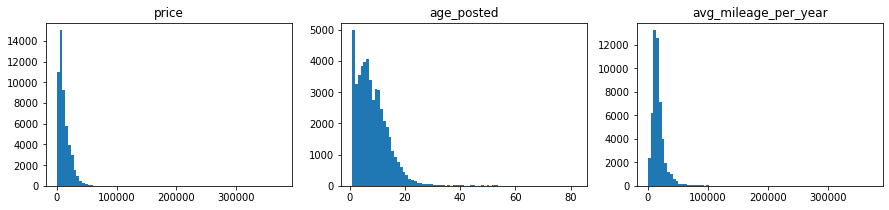

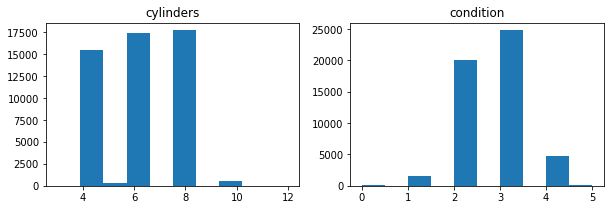

In [43]:
#We define a function to plot several histograms at once
def hist_in_row(data, features, bins_num=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(features):
        axes[i%cols_num].hist(x=feature, data=data, bins=bins_num)
        axes[i%cols_num].set_title(feature)
        
#Plotting histograms
hist_in_row(data, ['price', 'age_posted', 'avg_mileage_per_year'], bins_num=80) 
hist_in_row(data, ['cylinders', 'condition'])

On the histograms for the features *'price'*, *'age_posted'* and *'avg_mileage_per_year'* there are inadequately large values.

- There aren't many values of price after \\$50,000, although we have a few outliers ranging all the way up to \\$300,000.
- The most of the values of age lie in the range ending at 30 years, although there are outliers going up to 85-90 years.
- The values of the average mileage that exceed 50,000 are rare, almost nobody takes more than 100,000, but there are single outliers around 300,000.
- For vehicle age, the histogram has one peak around 5 years old and another small one around 10 years old, or there is a gap in ads for cars between 5 and 10 years old.
- Most cars have 4, 6 or 8 cylinder engines. There are almost no ads with other types of engines.
- Most of the vehicles are in good or excellent condition.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
       

Ok, agree with your conclusions here!

Now let us look at the number of adverts for each age of the vehicle

Text(0.5, 1.0, 'The number of ads for each age of the vehicle')

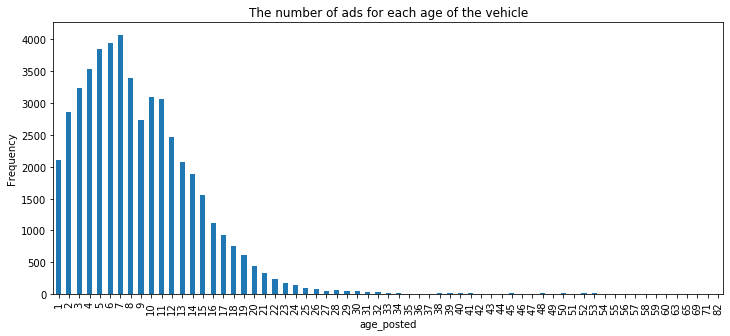

In [44]:
data.groupby('age_posted').age_posted.count().plot(kind='bar', figsize=(12, 5))
plt.ylabel('Frequency')
plt.title('The number of ads for each age of the vehicle')

The owners mainly sell cars that are more than 4-6 years old, those who are more attached to their car do it after 10 years. Or perhaps this is just the second sale of a car by those who bought a five-year-old car. Most likely, the first peak corresponds to the end of the warranty service, and the second peak corresponds to the service life.

Let's take a look at where to draw the outliers boundaries using boxplot.

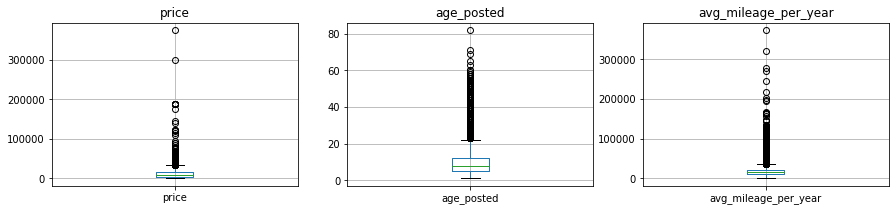

Some statistic to determine the limits of outliers:


,min,max,outliers_border
price,1.000000,375000.0,34595.000000
age_posted,1.000000,82.0,22.500000
avg_mileage_per_year,0.034483,373200.0,36095.571429


In [45]:
#define a function to plot several boxplot in one line
def boxplot_in_row(features):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(features):
        data.boxplot(feature, ax=axes[i%cols_num])
        axes[i%cols_num].set_title(feature)

#Loooking at boxplot graphs for features with outlies      
boxplot_in_row(['price', 'age_posted', 'avg_mileage_per_year'])
plt.show()

#function to calculate Q3+1.5IQR value
def outliers_border(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75) 
    IQR = Q3 - Q1 
    return Q3 + 1.5 * IQR

print(BOLD + 'Some statistic to determine the limits of outliers:' + END)
data[['price', 'age_posted', 'avg_mileage_per_year']].agg(['min', 'max', outliers_border]).T

The __*upper whisker*__ of price __*boxplot*__ ends at about __*\\$35,000*__. So it's the approximate border of the "typical" range. We can set this value as a maximum limit of price. The mininum price in __*$1 looks also extremely low*__, although the lower wisker includes this value. It's necessary to look at the left side of the price distribution in more detail.

Let's set a border for vehicle __*age*__ as __*25 years*__ old according to the upper whisker.

For __*average mileage*__ the border can be considered __*40,000*__, rounding off the value of the corresponding upper whisker.

Let us look at the left side of the price histogram.

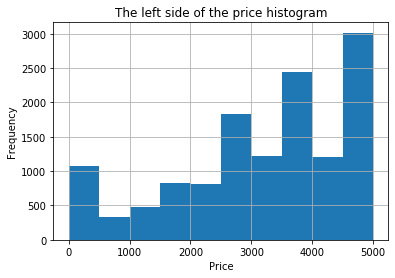

In [46]:
data.price.hist(range=(0, 5000));
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('The left side of the price histogram');

Let us __*set a minimum price as \\$500*__, it looks fair. Even a little less does not look believable. Plus, we have already decided to ignore the entries with price \\$1. We can ask experts or look at specific ads and the price of similar vehicles.

In [47]:
#filtering out the outliers
data_filtered = data.query('500 <= price <= 35000 and age_posted < 25 and avg_mileage_per_year < 40000', engine='python')

__*Data*__ with possible errors has been __*filtered out*__. Perhaps there were not too many errors in this data, but the price for rare cars is formed according to completely different rules.

Let us now plot histograms for the filtered data.

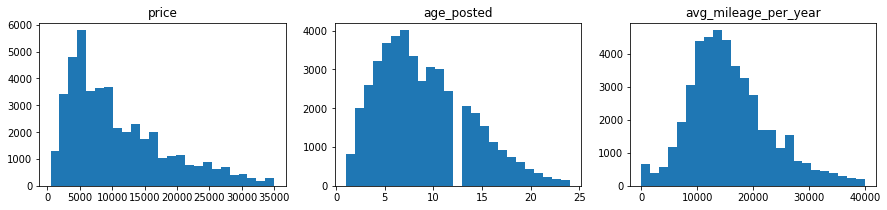

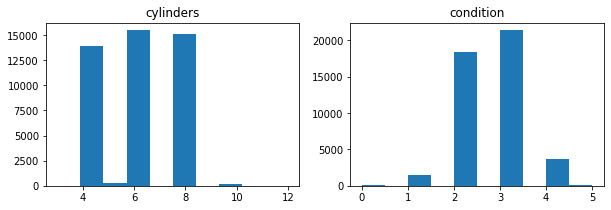

In [48]:
hist_in_row(data_filtered, ['price', 'age_posted', 'avg_mileage_per_year'], bins_num=25) 
hist_in_row(data_filtered, ['cylinders', 'condition'])

We removed the tails for the features *'price'*, *'age_posted'* and *'avg_mileage_per_year'* and the data is now not so skewed, but still has a positively skewed distribution. The readability of the histograms without outliers became better.

For variables *'cylinders'* and *'condition'*, nothing has changed after filtering.

Now, let us look at the dispersion of *days_listed* 

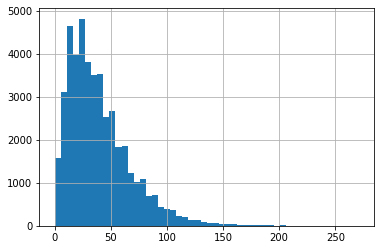

Some describe statistic of days_listed:


,min,max,mean,median,outliers_border
days_listed,0.0,271.0,39.586448,33.0,104.0


In [49]:
data_filtered.days_listed.hist(bins=50);
plt.show()

print(BOLD + 'Some describe statistic of days_listed:' + END)
data_filtered[['days_listed']].agg(['min', 'max', 'mean', 'median', outliers_border]).T

We see that adverts are displayed from __*0 - 9 months*__. The distribution of this feature is positively skewed. Adverts often do not run that long. Moreovere the average is greater than the median. Thus, 9 months is more of a outlier.

The __*typical lifetime*__ of an ad is about __*a month*__. Sometimes ads are __*deleted on the same day*__. It's a pretty quick deal or the owner has changed his mind about selling the car. __*More than 100 days*__ looks like an __*abnormally long time*__.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
       

You are doing great! I can agree with your logic of the analysis here!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, it is correct to use IQR method for deleting the outliers, it is rather effective one for this task! More details about working with the outliers you can find by links:
    
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    
http://colingorrie.github.io/outlier-detection.html#iqr-method
    
https://statisticsbyjim.com/basics/outliers/

Let's look at number of ads and the average price for each type of vehicle.
Then we create a pivot table for vehicle types.
And then we plot the number of ads and the average price for each type of vehicle.

Number of ads and the average price for each type of vehicle:
             ads_count     avg_price
type                                
SUV              11094  10237.511718
bus                 23  17445.913043
convertible        335  12931.988060
coupe             1833  13245.024550
hatchback          937   6591.061900
mini-van          1071   7449.522876
offroad            179  14205.262570
other              217   9790.640553
pickup            5893  14049.548617
sedan            11015   6684.015252
truck            10351  14885.513767
van                566  10431.374558
wagon             1467   8787.801636


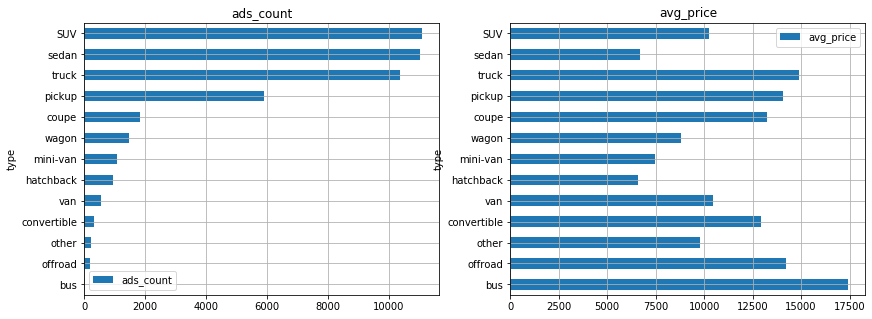

In [50]:
ads_by_types = data_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
ads_by_types.columns = ['ads_count', 'avg_price'] 

print(BOLD + 'Number of ads and the average price for each type of vehicle:' + END)
print(ads_by_types)

#we define a function to create multiple boxplots at once
def barplot_in_row(data, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(7*len(features), 5))
    for i, feature in enumerate(features):
        data.plot.barh(y=feature, ax=axes[i%cols_num], grid=True)
        axes[i%cols_num].set_title(feature)
        
#plotting the number of ads and average price for each vehicle type
barplot_in_row(ads_by_types.sort_values('ads_count'), ['ads_count', 'avg_price'])

The __*most popular*__ ads sell __*SUV*__ and __*sedans*__, with pickups just a little behind them. Although pickups are so similar to trucks, trucks have higher number of ads and higher prices. This may also be some local specific feature of the market.

The price categories of these most popular types of machines are very different. Sedans have nearly the lowest price, while pickups and trucks have almost the highest price, and the SUV lies in between. Prices for other vehicles fluctuate within these limits. The bus price is the highest, and the Hatchback price is the lowest.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Absolutely true!

Now, let us look at the factors that may affect the price for two groups of the most popular types of cars.

SUV


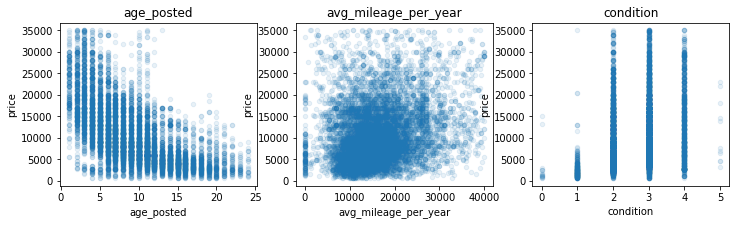

Correlation of the age and the avg mileage with the price:
age_posted             -0.624898
avg_mileage_per_year    0.267667
condition               0.285642
Name: price, dtype: float64


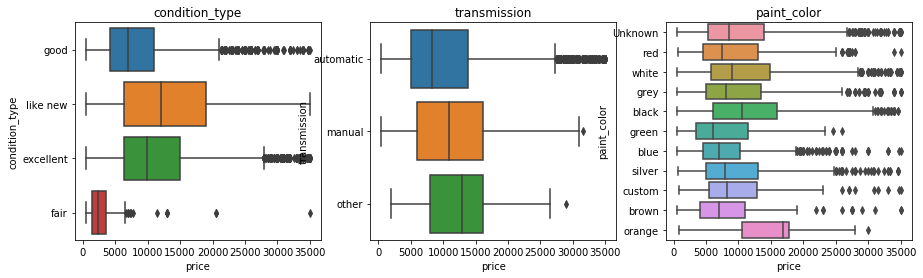

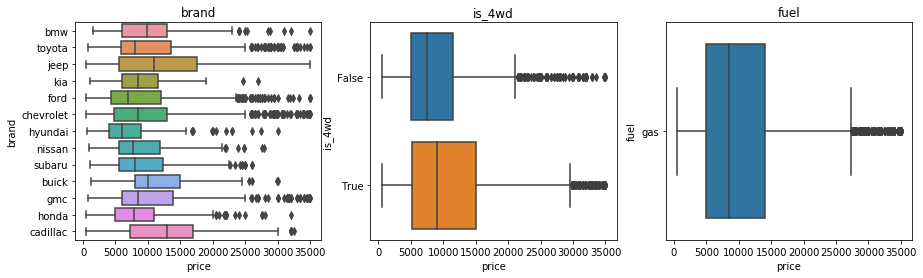


sedan


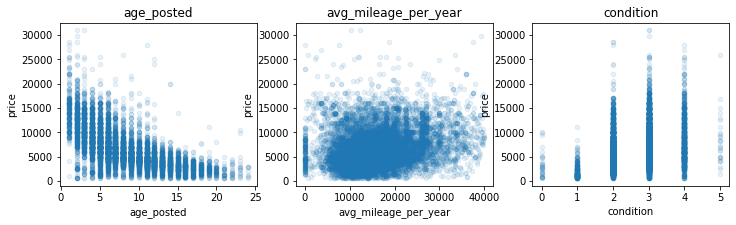

Correlation of the age and the avg mileage with the price:
age_posted             -0.649825
avg_mileage_per_year    0.221692
condition               0.309262
Name: price, dtype: float64


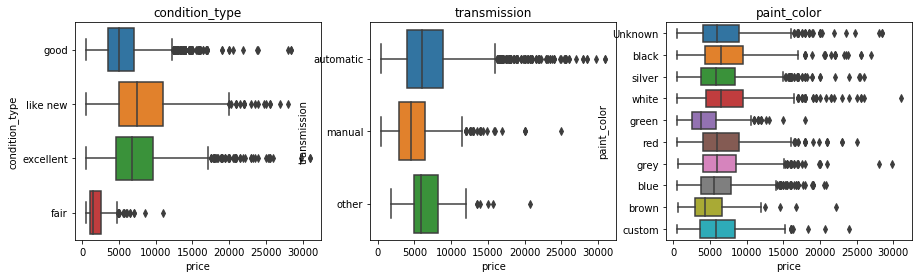

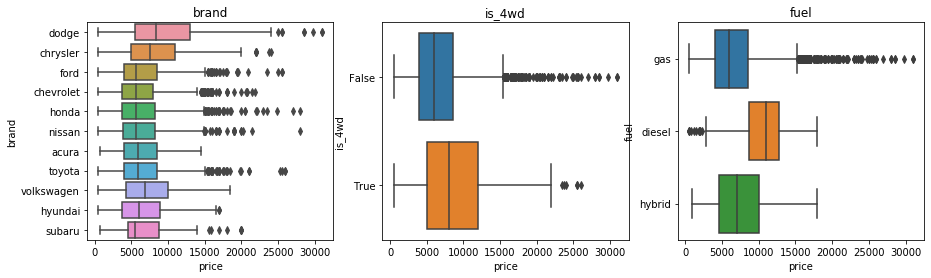

In [51]:
#Getting data slice for SUV and sedan
data_with2type = data_filtered.query('type in ["SUV", "sedan"]')\
    .merge(condition_dictionary, left_on='condition', right_on='id')

#function to remove small observation numbers in the group by categories
def remove_small_observation_num(data, category, feature, threshold=50):
    cat_filtered = data.pivot_table(index=category, values=feature, aggfunc='count').query(feature+'>50').index
    return data.query(category+' in @cat_filtered')

#function to plot scatter graphs in a line
def scatter_in_row(data, feature, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(4*len(features), 3))
    for i in range(len(features)):
        data.plot(x=features[i], y=feature, ax=axes[i%cols_num], kind='scatter', alpha=0.1)
        axes[i%cols_num].set_title(features[i])

#function to plot boxplot by categorical feature in a line
def boxplot_by_cat_in_row(data, feature, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*len(features), 4))
    for i, category in enumerate(features):
        sn.boxplot(y=category, x=feature,\
                    data=remove_small_observation_num(data, category, feature),\
                    ax=axes[i%cols_num], orient='h');
        axes[i%cols_num].set_title(category)

#Plotting appropriate graphs and calculation of correlation coefficients for each types of car
for name, group_data in data_with2type.groupby('type'):
    print(BOLD + name + END)
    scatter_in_row(group_data, 'price', ['age_posted', 'avg_mileage_per_year', 'condition'])
    plt.show()
    
    print(BOLD + 'Correlation of the age and the avg mileage with the price:' + END)
    print(group_data[['price', 'age_posted', 'avg_mileage_per_year', 'condition']].corr().price[1:])
    
    boxplot_by_cat_in_row(group_data, 'price', ['condition_type', 'transmission', 'paint_color'])
    boxplot_by_cat_in_row(group_data, 'price', ['brand', 'is_4wd', 'fuel'])
    plt.show()
    print()

For both types of cars, there is an inverse relationship between age and price (see scatterplot, and the correlation cofficient is -0.7). Moreover, in the first five years, the decline is more significant than in the remaining time. In addition, there are cars with a fairly low price for any age of the car, this is most likely due to the poor condition of the car.

The price fluctuates a lot for all average mileages for both types of cars. And no dependence can be traced on the scatterplots. For sedans, there is a very high price for single ads. For SUV there are many expensive and many cheap cars at the same time, most likely in this case the condition and additional characteristics of the car is important. Cars with zero mileage will lag separately.

For both types of cars, cars with "fair" condition are much cheaper than others (see boxplot for price by condition_types). Among the SUV, cars with a condition "like new" stand out for their price (see boxplot). If we consider the condition as a numerical parameter, then we can see the relationship between the condition and the price in the scatter plot, but it is diffused and not linear. There are many points with a low price for cars in good condition, most likely this is due to the brand of the car originally from a lower segment or the unpopular color of the car. It's strange that new cars are cheaper. Perhaps the brand is from a cheaper price category or they have poorer equipment than expensive cars with good condition.

For SUV, cars with automatic transmission on average are slightly cheaper.

For SUV, orange cars are also distinguished by price: on average, they have a higher price. Among the sedans, green cars are slightly cheaper.

Among SUVs such brands as Jeep and Cadillac can be distinguished, they are on average slightly more expensive. Dodge, Chrysler and Volkswagen stand out for sedans. Hyundai is in opposite a little bit cheeper among SUVs and for sedans Subaru is slightly cheeper then others.

The presence of four-wheel drive does not significantly affect the value of the price for both groups.

The price of gas sedans is significantly higher than the prices of cars with a gasoline or hybrid engine. For SUVs, there is enough data only for gas vehicles.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Aditya, good job! It is great that you tried to automate plots building and correlation analysis at this step if the project, the realization looks really great!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>
        
What can I recommend for your future work: 
       
* as for correlation apart from correlation matrix (table) that you managed to create, you can also visualize correlation analysis using heatmap plot. More information below:
        
https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c?gi=59629750b22d
        
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
        
https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
        
https://datatofish.com/correlation-matrix-pandas/
        
https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
       
One more option - pairplot:
       
https://seaborn.pydata.org/generated/seaborn.pairplot.html
       
2) it is better to analyze the condition column as categorical (despite the fact that we replace categories in this column with numbers (you need to do it), it is still can be considered as categorical), so it is better to analyze it as categorical, i.e. you can try to use graphical method here (barplot or boxplot), scatter plot is not very suitable here.
       


## 5. Overall Conclusion

We get a dataset of free advertisements from an Internet used-car marketplace, *Crankshaft List* to assess the impact of various vehicle characteristics on its price.

Before proceeding to the analysis, the data was preprocessed.

After a general review of the data revealed:

- The column corresponding to the presence of four-wheel drive has 50% unknown values that can be filled using some basic assumptions.
- Some features have unknown values that were be restored/filled using other fields.
- There are some extremely low and high prices.
- There are some surprisingly old cars.
- Some columns has excess datatypes, leading to higher memory consumption.
- It makes sense to contact the developer who sent the dataset to clarify possible reasons for gaps: perhaps these are just optional fields or it was an error.

The missing values in the column *'is_4wd'* were filled in accordance to the assumption that the value is skipped only for cars without 4WD. The excess types were converted to appropriate ones.

The missing values in the column *'paint_color'* was filled with the value 'Unknown', as we couldn't find any correlation to of the other features.

The missing values in the columns *'model_year'*, *'cylinders'* and *'odometer'* were filled with median() according to specific *'model'* of a missing *'model_year'* or *'cylinder'* or *'odometer'* respectively.

Some additional characteristics were calculated, such as vehicle age at the time of ad placing or average mileage, required for further analysis.

The distributions of features with odd values were considered and limits of outliers were determined to filter them out. Prices less than \\$500 and more than \\$35,000 have been filtered. Adverts with a vehicle age less than 25 years old and average mileage less 40,000 were left.

The typical advert lifetime was analyzed. On average, an advert is on the site for about a month. Sometimes ads are deleted on the same day. Some ads are on the site for up to 9 months.

For each type of vehicle the number of ads and the average price were explored. Most of the ads are for the sale of SUV and sedans. Pickups and trucks form the next big ad group. The price categories of these most popular types of machines are very different. Sedans have the second lowest price, pickups and trucks have the highest price after bus price, and the SUV are in between. Prices for other vehicles vary within these limits.

The factors impacting the price were determined:

- There is an inverse relationship between age and price for both SUVs and sedans, in the first five years, the decline in price is more significant than in the remaining time.
- For different conditions of the car, the price is different, so for a "fair" condition the price is much lower than for a "good", "excellent" or "like new" condition for both SUVs and sedans, among the SUV, cars with a condition "like new" stand out for their price.
- For SUV, cars with automatic transmission on average are slightly cheaper.
- On average orange SUVs have a higher price, green sedans are in opposite slightly cheaper than the rest.
- Among SUVs brands Jeep and Cadillac are on average slightly more expensive, Hyundai is in opposite a little bit cheeper; Dodge and Chrysler have higher price among sedans, Subaru is slightly cheeper then others.
- Among sedans the prices with gas fuel is significantly higher than the prices of cars with a gasoline or hybrid engine.

It seems that there is some relation between considered features and vehicle price. But it is necessary to look at the statistical significance of all revealed differences.

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**


Aditya, thank you for submitting your project! I can see that you've worked really hard on it! You did a great job to bring the project to completion, thanks for your patience and desire to complete the project! I have not any critical remarks to your project, only recommendations that I believe you can study by yorself! Your project looks great so I hasten to say that your project has been accepted and you can proceed to the next sprint!

**Good things and practices in your project I want to highlight🙂**:
* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You used visualization a lot, good job!
* You formulated deep and comprehensive conclusions after the each step of the analysis, good job, I can see your analytical approach.
* Your project is well-structured and orginized, it was pleasure for me to review it!
* A big plus for automation of the analysis, your functions are really effective!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/OZbGrdp7FiDiE/giphy.gif)  